<a href="https://colab.research.google.com/github/adithyaprabhu007/math-coding-notes/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/03_Clustering_Marketing.csv')
df.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


In [ ]:
# 1. Convert column to numeric, turning errors into NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# 2. Calculate the mean (which is a float) and fill NaN values
mean_age = df['age'].mean()
df['age'].fillna(mean_age, inplace=True)

# 3. NOW, convert the entire column to int
# This will work because there are no more NaN values
df['age'] = df['age'].astype(int)

# Verify the final data type
print(df['age'].dtype)
# Expected output: int64

int64


/tmp/ipython-input-54-2681883761.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(mean_age, inplace=True)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
oh1=OneHotEncoder(sparse_output=False)
df['gender'].fillna(df['gender'].mode(),inplace=True)
df['gender']=oh1.fit_transform(df[['gender']])


/tmp/ipython-input-55-269204703.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna(df['gender'].mode(),inplace=True)


In [ ]:
df['gender'] = df['gender'].astype(int)

In [ ]:
df['gender'].dtype

dtype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   gradyear         15000 non-null  int64
 1   gender           15000 non-null  int64
 2   age              15000 non-null  int64
 3   NumberOffriends  15000 non-null  int64
 4   basketball       15000 non-null  int64
 5   football         15000 non-null  int64
 6   soccer           15000 non-null  int64
 7   softball         15000 non-null  int64
 8   volleyball       15000 non-null  int64
 9   swimming         15000 non-null  int64
 10  cheerleading     15000 non-null  int64
 11  baseball         15000 non-null  int64
 12  tennis           15000 non-null  int64
 13  sports           15000 non-null  int64
 14  cute             15000 non-null  int64
 15  sex              15000 non-null  int64
 16  sexy             15000 non-null  int64
 17  hot              15000 non-null  int64
 18  kissed

In [ ]:
original_columns = df.columns
original_index = df.index

In [ ]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()

# Fit and transform the DataFrame. This returns a NumPy array.
df_scaled_array = sc1.fit_transform(df)

# Convert the NumPy array back to a DataFrame, preserving column names and index
df_scaled = pd.DataFrame(df_scaled_array, columns=original_columns, index=original_index)

In [ ]:
df_scaled.sample(5)

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
270,-0.445090,0.597063,-0.057039,0.795961,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.041671,-0.368365,0.882285,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926
12073,0.450583,0.597063,-0.200617,-0.843130,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,2.974441,-0.259382,-0.218093,-0.174926
12849,1.346257,0.597063,-0.200617,-0.390967,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.041671,1.051334,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926
2198,0.450583,0.597063,-0.344194,0.767701,-0.338478,-0.36379,-0.241202,-0.21655,6.038694,-0.246048,...,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926
7033,-0.445090,0.597063,-0.057039,0.061196,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926


In [ ]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=3)
df_pca = pca1.fit_transform(df_scaled)

In [ ]:
df_pca

array([[-1.62006808, -0.0908732 , -0.3530059 ],
       [-0.7227013 ,  0.18570415, -0.16559392],
       [ 2.61970166,  0.38346622, -2.21297978],
       ...,
       [-1.09659138, -0.44570619,  0.18396381],
       [-1.36858095, -0.07871742, -0.34603274],
       [ 1.87896364, -0.64816408, -0.4332741 ]])

In [ ]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=7)
kmeans1.fit(df_pca)

KMeans(n_clusters=7)

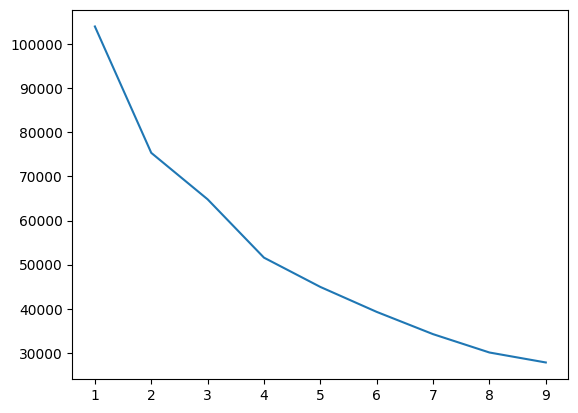

In [ ]:
wcss=[]
for i in range(1,10):
  kmeans1=KMeans(n_clusters=i)
  kmeans1.fit(df_pca)
  wcss.append(kmeans1.inertia_)

plt.plot(range(1,10),wcss)
plt.show()